In [1]:
# Tell Jupyter where to find the code
import os, sys
sys.path.append(os.environ['CODE']) #CODE is defined in the conda environment "Notes"
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('notebook')
import matplotlib.cm as cm

import graphene
import fundamental_constants as fc

<a class='anchor' id='toc'/>

[1. Optical Conductivity](#optical-conductivity)

[2. Permittivity](#permittivity)

[3. Reflection, Absorption, and Transmission](#ref-abs-tran)

&ensp;[a. Bounds on Cross Section](#bound-cs)

[4. Local Density of States](#ldos)

&ensp;[a. LDOS of Planar Sheet](#planar-ldos)

&ensp;[b. Bounds on LDOS](#bound-ldos)

# 1. Optical Conductivity <a class='anchor' id='optical-conductivity'/>

[top](#toc)

The optical conductivity $\overleftrightarrow{\sigma}(q,\omega)$ relates the surface current $\mathbf K(\omega)$ to an applied electric field $\mathbf E(\omega)$

$$
\mathbf K(\omega)=\int \overleftrightarrow\sigma(q,\omega)\mathbf E(\omega) dq
$$

Here, $\omega$ refers to the frequency and $q$ refers to the scattering wavevector. In many cases, $\overleftrightarrow{\sigma}$ is isotropic, so the above equation can be reduced to a scalar equation
$$
K(\omega)=\int \sigma(q,\omega)E(\omega)dq
$$

The most general expression for the conductivity is given by the Kubo formula.
$$
\sigma(q,\omega)=\frac{ie^2\omega}{q^2}\chi^0(q,\omega)
$$
however, it is common to use simpler limiting cases of this expression.

## Local Conductivity

The local conductivity is the one which is most familiar and it relates the surface current to the electric field linearly
$$
\mathbf K(\omega)=\sigma(\omega)\mathbf E
$$

It can be found from the nonlocal conductivity by taking the limit $\lim_{q\to 0}\sigma(q,\omega)=\sigma(\omega)$.

Lets see what it looks like for graphene. Here we choose a Fermi level $\epsilon_F=0.4$ eV,and vary scattering rate $\gamma$ and temperature $T$ for the range of frequencies $\omega$ we want to view. Then we plot and compare to another resource.

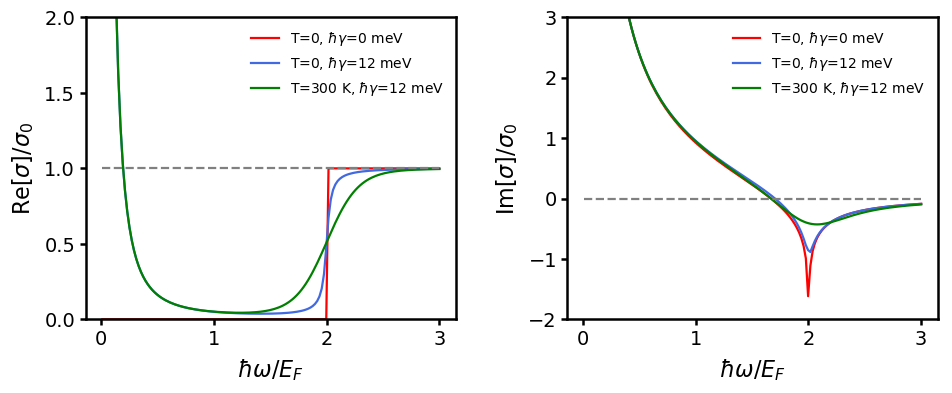

In [3]:
mlg = graphene.Monolayer()
eF = 0.4 * fc.e_proton
g =0.012*fc.e_proton / fc.hbar
w = np.linspace(0.01,3,num=150) / (fc.hbar/eF)

# Choosing q=0 automatically returns the local conductivity
s_0K_0g = mlg.OpticalConductivity(q=0,omega=w,gamma=0,eFermi=eF,T=0)
s_0K_12g = mlg.OpticalConductivity(q=0,omega=w,gamma=g,eFermi=eF,T=0.01)
s_300K_12g = mlg.OpticalConductivity(q=0,omega=w,gamma=g,eFermi=eF,T=300)

fig, (re_ax, im_ax) = plt.subplots(1,2, figsize=(11,4))

tmpl= 'T=0, $\hbar\gamma$=0 meV'
s_Re = np.real(s_0K_0g)
s_Im = np.imag(s_0K_0g)
re_ax.plot(w*fc.hbar/eF,s_Re/ fc.sigma_0,'r',label=tmpl)
im_ax.plot(w*fc.hbar/eF,s_Im/ fc.sigma_0,'r',label=tmpl)

tmpl = 'T=0, $\hbar\gamma$=12 meV'
s_Re = np.real(s_0K_12g)
s_Im = np.imag(s_0K_12g)
re_ax.plot(w*fc.hbar/eF,s_Re/ fc.sigma_0,color='royalblue',label=tmpl)
im_ax.plot(w*fc.hbar/eF,s_Im/ fc.sigma_0,color='royalblue',label=tmpl)

tmpl = 'T=300 K, $\hbar\gamma$=12 meV'
s_Re = np.real(s_300K_12g)
s_Im = np.imag(s_300K_12g)
re_ax.plot(w*fc.hbar/eF,s_Re/ fc.sigma_0,color='green',label=tmpl)
im_ax.plot(w*fc.hbar/eF,s_Im/ fc.sigma_0,color='green',label=tmpl)

re_ax.plot(w*fc.hbar/eF,np.ones_like(w),'--',color='gray')
re_ax.set_ylabel("Re[$\sigma$]/$\sigma_0$")
re_ax.set_xlabel("$\hbar\omega/E_F$")
re_ax.set_ylim(0,2)

#im_ax.plot(w*fc.hbar/eF,sigma_Im/fc.sigma_0)
im_ax.set_ylabel("Im[$\sigma$]/$\sigma_0$")
im_ax.set_xlabel("$\hbar\omega/E_F$")
im_ax.plot(w*fc.hbar/eF,np.zeros_like(w),'--',color='gray')
im_ax.set_ylim(-2,3)

re_ax.legend()
im_ax.legend()
plt.show()

Compare to [Christensen 2017](http://link.springer.com/10.1007/978-3-319-48562-1) below

<img src='images/christensen-thesis-2017-fig4-4.png' width='500px'/>

We can also consider the magnitude and phase.

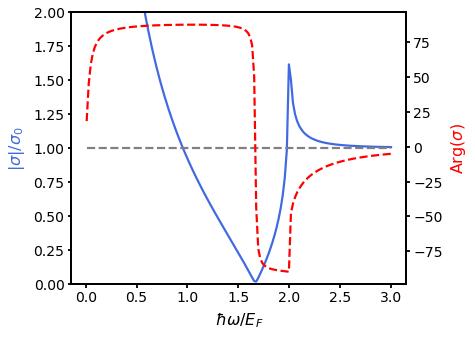

In [22]:
sigma = mlg.OpticalConductivity(0,omega,gamma,eF,T=0)
sigma_abs = np.abs(sigma)
sigma_ang = np.angle(sigma)

fig, ax = plt.subplots( figsize=(6,5))

color='royalblue'
ax.plot(omega*fc.hbar/eF,sigma_abs/ fc.sigma_0,color=color,label='$|\sigma|/|\sigma_0|$')
ax.plot(omega*fc.hbar/eF,np.ones_like(omega),'--',color='gray')
ax.set_ylabel("|$\sigma$|/$\sigma_0$",color=color)
ax.set_xlabel("$\hbar\omega/E_F$")

ax.set_ylim(0,2)

color='red'
ax2 = ax.twinx()
ax2.plot(omega*fc.hbar/eF,sigma_ang*(360/(2*fc.pi)),color='red',linestyle='--',label='arg($\sigma$)')
ax2.set_ylabel('Arg($\sigma$)',color='red')

plt.show()

## Nonlocal

The nonlocal conductivity is given by
$$
\sigma(q,\omega)=\frac{ie^2\omega}{q^2}\chi^0(q,\omega)
$$

where $\chi^0$ is the polarizibility.

# `Polarizibility`

The quantity $\chi^0$ is the *polarizibility*, and it relates the charge density to the potential in reciprocal space, $n_{ind}(q,\omega)=\chi^0(q,\omega)\phi(q,\omega)$. It is also used in the Kubo Formula to compute the conductivity.

## Full Expression

The full RPA polarizibility is given by

$$
    \chi^0(\mathbf q, \omega) = \frac{g}{A}\sum_{nn'\mathbf k}\frac{f_{n\mathbf k} - f_{n'\mathbf{k+q}}}{\epsilon_{n\mathbf k}-\epsilon_{n'\mathbf{k+q}}+\hbar(\omega+i\eta)}|\left<n\mathbf k|e^{-i\mathbf{q\cdot r}}|n'\mathbf{k+q}\right>|^2
$$

where $g=4$, for spin and valley degeneracy. 

### Low Temperature

Two papers have calculated the low temperature approximation of $\chi^0$ with real $\omega$ ([Hwang and Das Sarma 2007](https://link.aps.org/doi/10.1103/PhysRevB.75.205418), [Wunsch et al. 2006](https://doi.org/10.1088%2F1367-2630%2F8%2F12%2F318)). Note that these expressions do not include loss due to impurities. For that, we need an expression for $\chi^0$ accepts complex arguments of $\omega$. The expression by [Sernelius 2012](https://journals-aps-org.ezproxy.library.wisc.edu/prb/pdf/10.1103/PhysRevB.85.195427) allows for such complex arguments.

$$
\chi^0(\mathbf q,\omega)=-DOS(\epsilon_F)\left\{ 1 + \frac{x^2}{4\sqrt{x^2-\bar z^2}}[\pi - f(x,\bar z)] \right\}
$$

where 

$$
f(x,\bar z) = \arcsin\left(\frac{1-\bar z}{z}\right) +\arcsin\left(\frac{1+\bar z}{x}\right) - \frac{\bar z -1}{x}\sqrt{1 - \left(\frac{\bar z-1}{x}\right)^2} + \frac{\bar z +1}{x}\sqrt{1-\left(\frac{\bar z+1}{x}\right)^2}
$$

Below, we show that for real $\omega$, this reduces to the expression given by [Wunsch et al. 2006](https://doi.org/10.1088%2F1367-2630%2F8%2F12%2F318)

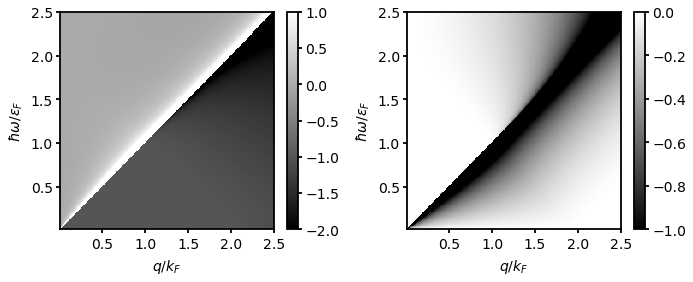

In [5]:
mlg=Graphene.Monolayer()
eF = 0.4 * fc.e_proton
gamma=0
DOS = mlg.DensityOfStates(eF,model='LowEnergy')
kF = mlg.kFermi(eF,model='LowEnergy')
omega = np.linspace(0.01,2.5,num=250) / (fc.hbar/eF)
q = np.linspace(0.01,2.5,num=250) * kF 

pol = mlg.Polarizibility(q,omega[:,np.newaxis],gamma,eF)

fig, (re_ax, im_ax) = plt.subplots(1,2,figsize=(11,4))

re_image = re_ax.imshow(np.real(pol)/DOS,
           extent=(q[0]/kF,q[-1]/kF,fc.hbar*omega[0]/eF,fc.hbar*omega[-1]/eF),
           vmin=-2,vmax=1,cmap=cm.gray,
           origin='lower',aspect='auto')

re_cb = fig.colorbar(re_image, ax=re_ax)

im_image = im_ax.imshow(np.imag(pol)/DOS,
           extent=(q[0]/kF,q[-1]/kF,fc.hbar*omega[0]/eF,fc.hbar*omega[-1]/eF),
           vmin=-1,vmax=0,cmap=cm.gray,
           origin='lower',aspect='auto')

im_cb = fig.colorbar(im_image, ax=im_ax)

re_ax.set_ylabel('$\hbar\omega$/$\epsilon_F$',fontsize=14)
re_ax.set_xlabel('$q/k_F$',fontsize=14)

im_ax.set_ylabel('$\hbar\omega$/$\epsilon_F$',fontsize=14)
im_ax.set_xlabel('$q/k_F$',fontsize=14)
plt.show()

Figure 1 of [Wunsch 2006](https://doi.org/10.1088%2F1367-2630%2F8%2F12%2F318)

<img src='images/wunsch-dynamical-2006-fig1.png' width='500px'/>

## Derivative of Polarizibility

Future expressions will require the partial derivative of $\chi^0(q,\omega)$.

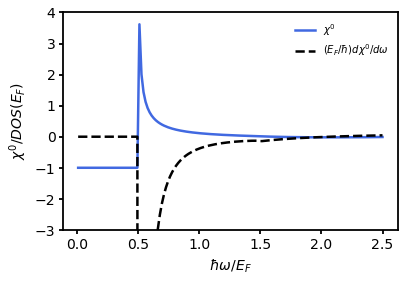

In [6]:
mlg = Graphene.Monolayer()

eF = 0.4 * fc.e_proton
T=0
DOS = mlg.DensityOfStates(eF,model='LowEnergy')
gamma=0
kF = mlg.kFermi(eF,model='LowEnergy')
omega = np.linspace(0.01,2.5,num=150) / (fc.hbar/eF)
q = 0.5 * kF

pol = mlg.Polarizibility(q,omega,gamma,eF,T)
dpol = mlg.dPolarizibility(q,omega,gamma,eF,T,dvar='omega')

plt.plot(fc.hbar*omega/eF,np.real(pol)/DOS,color='royalblue',linewidth=2.5,label='$\chi^0$')
plt.plot(fc.hbar*omega/eF,(eF/fc.hbar)*dpol/DOS,color='black',linestyle='--',linewidth=2.5,label='$(E_F/\hbar) d\chi^0/d\omega$')
plt.ylim(-3,4)
plt.xlabel('$\hbar\omega/E_F$',fontsize=14)
plt.ylabel('$\chi^0/DOS(E_F)$',fontsize=14)

plt.legend()
plt.show()

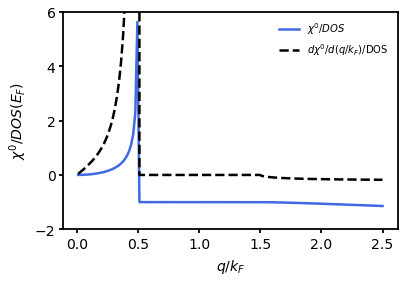

In [7]:
mlg = Graphene.Monolayer()

eF = 0.4 * fc.e_proton
T=0
DOS = mlg.DensityOfStates(eF,model='LowEnergy')
gamma=0
kF = mlg.kFermi(eF,model='LowEnergy')
omega = 0.5 / (fc.hbar/eF)
q = np.linspace(0.01,2.5,num=150) * kF

pol = mlg.Polarizibility(q,omega,gamma,eF,T)
dpol = mlg.dPolarizibility(q,omega,gamma,eF,T,dvar='q')

plt.plot(q/kF,np.real(pol)/DOS,color='royalblue',linewidth=2.5,label='$\chi^0/DOS$')
plt.plot(q/kF,(kF)*dpol/DOS,color='black',linestyle='--',linewidth=2.5,label='$d\chi^0/d(q/k_F)$/DOS')
plt.ylim(-2,6)
plt.xlabel('$q/k_F$',fontsize=14)
plt.ylabel('$\chi^0/DOS(E_F)$',fontsize=14)

plt.legend()
plt.show()

# 2. Permittivity <a class='anchor' id='permittivity'/>

[top](#toc)

$$
\epsilon_{||}=1+\frac{i\sigma(\omega)}{\omega\epsilon_0}
$$

In [19]:
gamma

1.9226112e-21

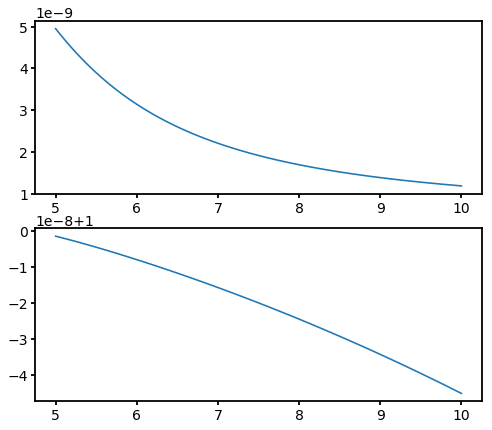

In [21]:
mlg = graphene.Monolayer()

n1, n2, n3 = 2e12*1e4, 5e12*1e4, 12e12*1e4

wavelength = np.linspace(5,10,num=100)*1e-6
omega = 2*fc.pi*fc.c0 / wavelength
gamma=0.012*fc.e_proton
epsilon1 = mlg.Permittivity(omega,mlg.FermiLevel(n1),T=300,gamma=gamma)

fig, (iax,rax) = plt.subplots(2,1,figsize=(8,7))

iax.plot(wavelength*1e6,np.imag(epsilon1))
rax.plot(wavelength*1e6,np.real(epsilon1))
plt.show()

<img src='images/yao-broad-2013-fig1.png' width='400px'/>

# 3. Reflection, Absorption, and Transmission <a class='anchor' id='ref-abs-tran'/>

[top](#toc)

Reflection is simply the squared magnitude of the Fresnel reflection coefficient $R_\alpha=|r_\alpha|^2$, where $\alpha$ is either $s$ or $p$ polarization.

## 3a. Bounds on Cross Section <a class='anchor' id='bound-cs'/>

[top](#toc)

[Miller et al. 2017](http://pubs.acs.org/doi/10.1021/acs.nanolett.7b02007) describes what is possible for the optical response of various 2D materials. They find that for a 2D scatterer with local conductivity $\overleftrightarrow\sigma(\omega)$, the optical response is bounded by, what they entitle, a *material figure or merit* given by

$$
\text{Material FOM:   }F=Z_0||\overleftrightarrow\sigma^\dagger(\text{Re}[\overleftrightarrow\sigma])^{-1}\overleftrightarrow\sigma||_2
$$

where  $||.||_2$ is the *induced matrix 2-norm*. The cross sections $\sigma_\alpha$ are found to be bounded by
$$
\boxed{
    \sigma_{sca}/A \leq \frac{1}{4}F\\
    \sigma_{abs}/A \leq  F\\
    \sigma_{ext}/A \leq  F\\
}
$$


They identify graphene as one of the best in the mid-infrared and optical region of the EM spectrum (along with silver). Here, we attempt to replicate their results for graphene using the `Graphene.Nanostructure` class. For comparisons to other materials, see [this notebook] 

(They don't explicitly state the parameters used in Figure 1, but in later calculations, they use $T=300$ K and $\gamma$=($10^{12}$ eV/s)/$\epsilon_F$. Using those parameters, our results match)

In [9]:
mlg_nano = Graphene.Monolayer()

omega = np.linspace(.1,2,num=100)*fc.e_proton /fc.hbar
gamma = lambda eF: 10**12 * fc.e_proton / eF
T=300

eF1, eF2, eF3 = 0.2*fc.e_proton, 0.4*fc.e_proton, 0.6*fc.e_proton

bound_gr_high = mlg_nano.OpticalResponseBound(omega,gamma(eF1),eF1,T,restype='CSabs')
bound_gr_mid = mlg_nano.OpticalResponseBound(omega,gamma(eF2),eF2,T,restype='CSabs')
bound_gr_low = mlg_nano.OpticalResponseBound(omega,gamma(eF3),eF3,T,restype='CSabs')

UnboundLocalError: local variable 'LDOSprop' referenced before assignment

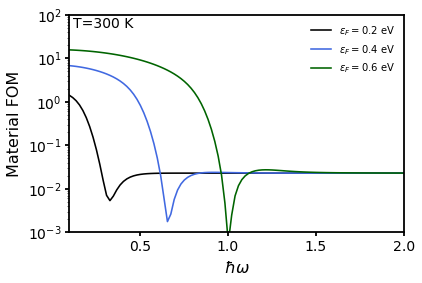

In [3]:
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_high,color='black',label='$\epsilon_F=%.1f$ eV' % (eF1/fc.e_proton))
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_mid,color='royalblue',label='$\epsilon_F=%.1f$ eV' % (eF2/fc.e_proton))
plt.semilogy(omega*fc.hbar/fc.e_proton,bound_gr_low,color='darkgreen',label='$\epsilon_F=%.1f$ eV' % (eF3/fc.e_proton))
plt.xlabel('$\hbar\omega$')
plt.ylabel('Material FOM')
plt.ylim(1e-3,1e2)
plt.xlim(0.1,2)
plt.text(0.12,5e1,'T=%d K' %(T),fontsize=14)
plt.legend()
plt.show()

<img src='images/miller-limits-2017-fig1.png' width='400px'/>

# 4. Local Density of States <a class='anchor' id='ldos'/>

[top](#toc)

## 4a. LDOS of Planar Sheet <a class='anchor' id='planar-ldos'/>

[top](#toc)

Above any planar structure with rotational and translational symmetry,and taking the near-field regime $k_p\gg k_0$,

$$
\rho(\omega)=\int \rho(\omega,k_{||}) dk_{||} \longrightarrow \rho(\omega)=\frac{k_0^2}{2\pi^2c}\int \frac{k_{||}^2}{k_0^3}e^{-2k_{||}z}\text{Im}[r_p] dk_{||}
$$

where we notice the prefactor is $\rho_o(\omega)$.

In [10]:
mlg = Graphene.Monolayer()

eF = 0.4*fc.e_proton
omega = 0.1 * fc.e_proton / fc.hbar
gamma = lambda eF: 10**12 * fc.e_proton / eF
T=0

d = np.logspace(np.log10(5e-9),np.log10(1e-6),num=100)

ldos = mlg.LocalDensityOfStates(d,omega,gamma(eF),eF,T)

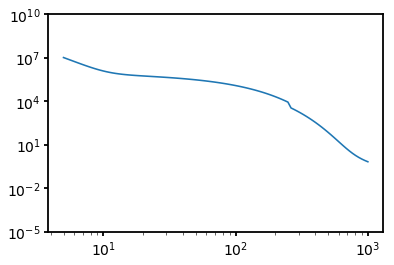

In [11]:
plt.loglog(d*1e9,ldos)

plt.ylim(1e-5,1e10)
plt.show()

## 4b. Bounds on LDOS Enhancement <a class='anchor' id='bound-ldos'/>

[top](#toc)

In [24]:
mlg_nano = Graphene.Monolayer()
eF = 0.4*fc.e_proton
omega = 0.6*fc.e_proton /fc.hbar
gamma = lambda eF: 10**12 * fc.e_proton / eF
T=0

d = np.logspace(np.log10(5e-9),np.log10(1e-6),num=100)

ldos_bound = mlg_nano.OpticalResponseBound(omega,gamma(eF),eF,T,d,restype='LDOStot')
#bound_gr_mid = mlg_nano.OpticalResponseBound(omega,gamma(eF2),eF2,T,restype='CSabs')
#bound_gr_low = mlg_nano.OpticalResponseBound(omega,gamma(eF3),eF3,T,restype='CSabs')

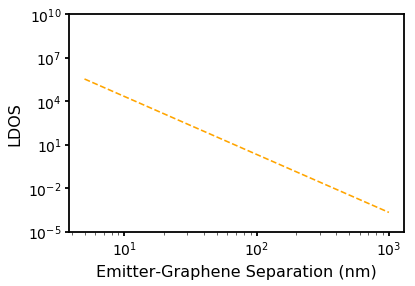

In [25]:
plt.loglog(d*1e9,ldos_bound,linestyle='--',color='orange')
plt.ylabel('LDOS')
plt.xlabel('Emitter-Graphene Separation (nm)')
plt.ylim(1e-5,1e10)
plt.show()

<img src='images/miller-limits-2017-fig3.png' width='400px'/>